# End-to-End Multi-Class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

Taking a photo of a dog, return the dog's breed.


## 2. Data

The data is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data


## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


## 4. Features

Some information about the data:
* Dealing with images (unstructured data), thus it is probably best to use Deep Learning/Transfer Learning.
* There are 120 breeds of dogs, thus there are 120 different classes.
* There are ~10,000+ images in the training set (labels are included.
* There are ~10,000+ images in the test set (labels not included, as these should be predicted.



### Prepare Workspace

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Ensure the use of a GPU

In [289]:
# Import TensorFlow into Colab
import tensorflow as tf 
print('TF version:', tf.__version__)          # Return the version of TensorFlow imported

TF version: 2.2.0


In [290]:
# Import Relevant Tools
import tensorflow_hub as hub
print('TF Hub Version:', hub.__version__)

# Check for GPU Availability
print('GPU', 'available (Woot Woot, Oh Yeaaaaaa!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')

TF Hub Version: 0.8.0
GPU available (Woot Woot, Oh Yeaaaaaa!!!!!)


## Getting Data Prepared (Turning into Tensors)

With all machine learning models, the data must be in numerical format. This is the first step: turning images into Tensors (Numerical Representations).

Start by accessing the data and reviewing the labels.

In [291]:
# Review the labels of the data
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     0cb5839c82f7c1286e55f260d4e608c4  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

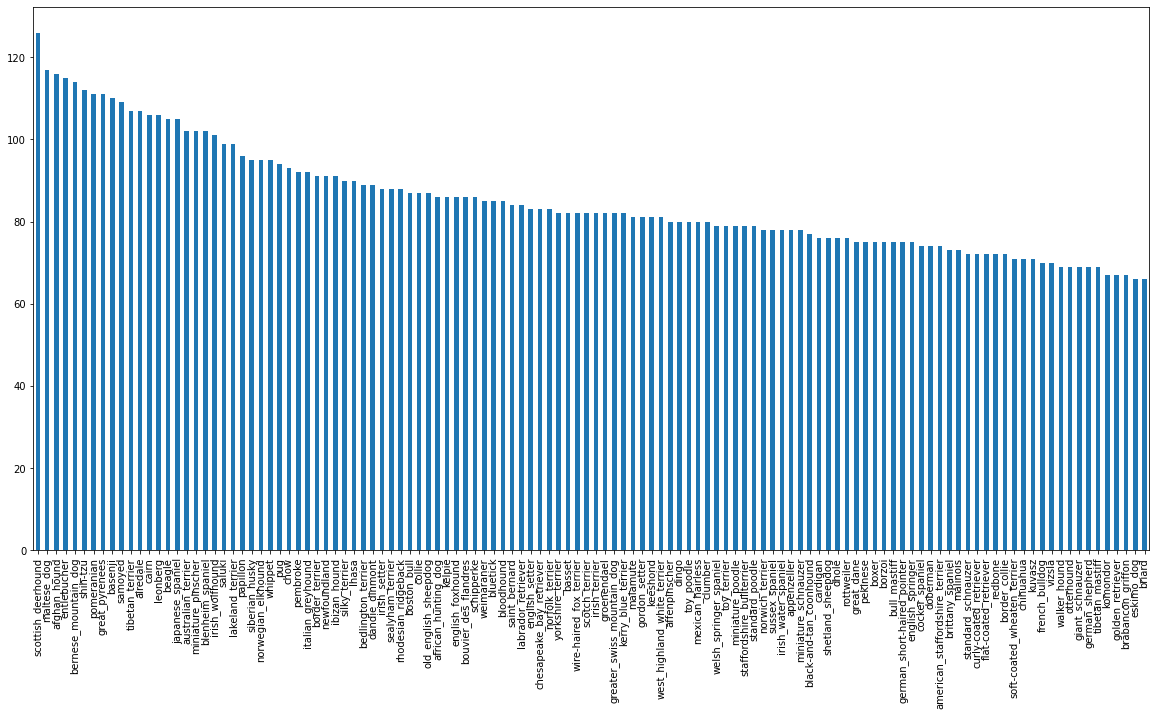

In [0]:
# Visualize the number of images for each breed (distribution)
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10));

In [0]:
# Determine the median for number of images per class (dog breed)
# Google suggests a minimum of 10 images per class, but recommends ~100
labels_csv['breed'].value_counts().median()

82.0

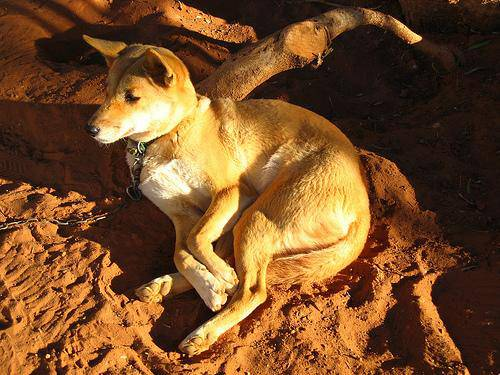

In [0]:
# View an image
from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

### Retrieving Images and Their Labels

Retrieve a list of all of the image file pathnames.

In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [0]:
# Create pathnames from image IDs
filenames = ['drive/My Drive/Dog Vision/train/' + fname + '.jpg' for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [293]:
import os
os.listdir('drive/My Drive/Dog Vision/train/')[:10]

['f692fcf95607b6e82528b0e90d705725.jpg',
 'f6ba94d33566242b8f4abdfcbd8a6bcb.jpg',
 'f6eed8d840086c27a17d7bc4f276dd56.jpg',
 'f6c0c3d4f34faf5caa5de6e81305de3b.jpg',
 'f738d8472928f06c5a3743914ac5d458.jpg',
 'f641553e92efc6824ca4b9cef837ba46.jpg',
 'f684cc75fb7996f315832975a3e07f67.jpg',
 'f66c888ffa1ff06fcc2eddafb3e13aaf.jpg',
 'f6e3a909254785d410b2418647034a5a.jpg',
 'f62145318e69a5061563eca2eb806d6e.jpg']

In [0]:
# Check whether number of filenames matches number of actual image files
if len(os.listdir('drive/My Drive/Dog Vision/train/')) == len(filenames):
  print('Filenames match actual amount of files!!! Woot woot! Proceed.')
else:
  print('Darn! Filenames do not match actual amount of files, check the target directory. ')

Filenames match actual amount of files!!! Woot woot! Proceed.


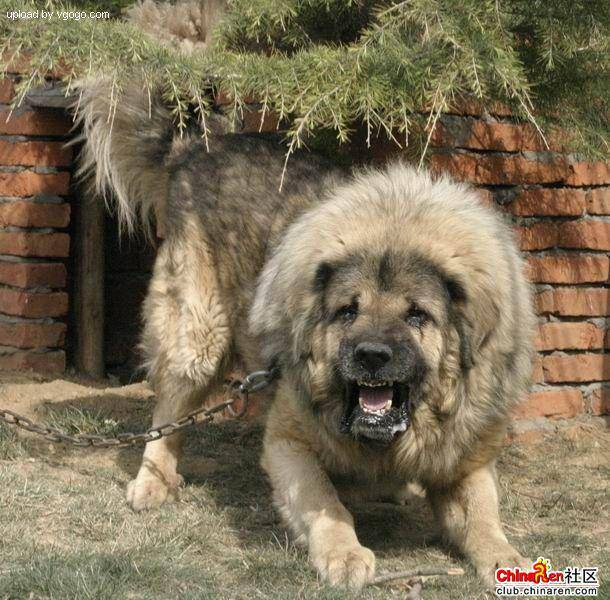

In [0]:
# Check that the data is in the right format
Image(filenames[9000])

In [0]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Now that the training image filepaths are compiled in a list, prepare the labels.

In [219]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)        # Same results as '.to_numpy()'
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
len(labels)

10222

In [0]:
# Check that the number of labels match the number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filename!')
else:
  print('Number of lables does not match the number of filenames, check the data directories!')

Number of labels matches number of filename!


In [0]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [0]:
unique_breeds[:20]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull'], dtype=object)

In [0]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
# Turn each label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
len(boolean_labels)

10222

In [0]:
# Example: Turn Boolean Array into Integers (0 or 1)
print(labels[0])                                    # Original Label Data
print(np.where(unique_breeds == labels[0]))         # Index of Label
print(boolean_labels[0].argmax())                   # Index of Label in Boolean Array
print(boolean_labels[0].astype(int))                # A 1 is listed where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

### Creating Validation Set from Training Data Given

Sicne the dataset from Kaggle does not contain a validation datset, one must be created.

In [0]:
# Setup X and y variables
X = filenames         # Data
y = boolean_labels    # Labels

In [0]:
len(filenames)

10222

Start off with experimenting on ~1,000 images and increase as needed.

In [0]:
# Set the number of images to use for experimenting
NUM_IMAGES = 1000       #@param {type:'slider', min:1000, max:10000, step:1000}

In [0]:
# Split the training data into train and validation sets
from sklearn.model_selection import train_test_split

# Split into datasets of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

# Check the shape of each dataset so no problems when fitting the model
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [0]:
# Review the training data
X_train[:2], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, F

## Preprocessing Images (Turn Images into Tensors)

First, review how to import an image.

In [220]:
# Convert image to NumPy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape                          # Returns (height, width, color channel) of the image selected

(257, 350, 3)

In [0]:
image.max(), image.min()

(255, 0)

In [0]:
image[:2]                         # Turns the image as an array

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [0]:
tf.constant(image)[:2]             # Turns the image into a Tensor

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

To preprocess the images into Tensors, create a function that does the following:
1. Take an image filepath as the input.
2. Use TensorFlow to read the file, and save it to a variable `image`.
3. Turn `image` (.jpg) into Tensors.
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224).
6. Return the modified `image`.

In [0]:
# Define image size
IMG_SIZE = 224

# Create a function that preprocesses images
def process_image(image_path):
  """
  Inputs an image file path and outputs an image into a Tensor.
  """
  # Reads image filepath as input
  image = tf.io.read_file(image_path)
  # Turn the .jpeg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to the desired value (244,244)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

## Turning Data into Batches

Importance as to why data should be turned into batches?

For example:
- Trying to process 10,000+ images in on batch...might not fit into memory.

Recommended batch size is 32 images at a time; may manually adjust if needed).

To use TensorFlow effectively, the data must be in the form of Tensor tuples which look as so: (`image`, `label`).

In [0]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file pathname and the correlating label, processes the image and returns a type of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [0]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now that a process has been created to turn the data into tuples of Tensors in the form `(image, label)`, make a function to turn all of the data (X & y) into batches!

In [0]:
# Define the batch size, 32 is a great start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (y) pairs. 
  Shuffles the data if it is training data, but does not shuffle if it is validation data.
  Also, accepts test data as input (no labels).
  """
  # If the data is a test dataset, there will not be labels
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))     # Filepaths only (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a validation dataset, no need to shuffle it
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),      # Filepaths  
                                               tf.constant(y)))     # Labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the the data is a training dataset
  else: 
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffle pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))

    # Create (image, label) tuples
    # Will turn the image path into a preprocessed image
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [0]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [0]:
# Check out the different attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

The data is now in batches, however, this is hard to understand/comprehend. Visualization to the rescue!

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and the corresponding labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize = (10, 10))
  # Loop through 25 (displaying the 25 images)
  for i in range (25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the gridlines off
    plt.axis('off')


In [0]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# Must unbatch the data to visualize it
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[1.19555563e-01, 1.62692815e-01, 1.47006541e-01],
          [1.04428604e-01, 1.43644303e-01, 1.39722735e-01],
          [4.09692496e-01, 4.48908180e-01, 4.50361282e-01],
          ...,
          [6.40795171e-01, 6.29030466e-01, 5.54520667e-01],
          [7.89395332e-01, 7.77630627e-01, 7.10876524e-01],
          [9.01069999e-01, 8.88307095e-01, 8.29834640e-01]],
 
         [[1.31497204e-01, 1.74634472e-01, 1.51105046e-01],
          [1.08090691e-01, 1.51221305e-01, 1.35554954e-01],
          [4.24508184e-01, 4.64770794e-01, 4.58524317e-01],
          ...,
          [6.72437668e-01, 6.60672963e-01, 5.86163163e-01],
          [8.92023861e-01, 8.80259156e-01, 8.13505113e-01],
          [9.65031743e-01, 9.53267038e-01, 8.87389600e-01]],
 
         [[1.36320636e-01, 1.70984492e-01, 1.50746390e-01],
          [1.04282223e-01, 1.38630942e-01, 1.26558140e-01],
          [4.50163633e-01, 4.84512359e-01, 4.78437424e-01],
          ...,
          [8.11451972e-01, 7.99687266e-01, 7.3345

In [0]:
len(train_images), len(train_labels)

(32, 32)

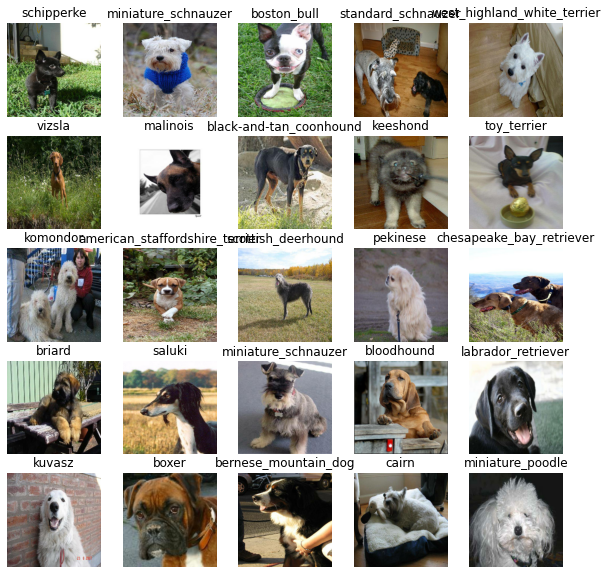

In [0]:
# Visualize the data in a training batch
show_25_images(train_images, train_labels)

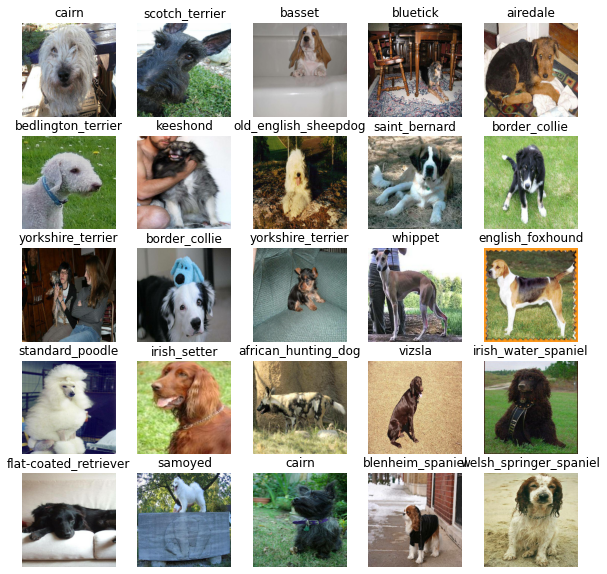

In [0]:
# Visualize the validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

Before building a model, a few things need to be defined:
* The input shape (images shape, in the form of Tensors) to the model.
* The output shape (image labels, in the form of Tensors) of the model.
* The URL of the model to be used from TensorFlow Hub (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4).

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]     # batch, height, width, color channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

Inputs, outputs, and model are now ready. 
Put them together into a Keras deep learning model!

Create a function which does the following:
* Takes the input shape, output shape and the model chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (essentially...do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it will get).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [0]:
# Create a function which builds a Keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building a model with:', MODEL_URL)

  # Setup the model layers (instantiate the model)
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),                             # Layer 1 (input layer)
    tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                          activation = 'softmax')          # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),    # multi-class classification 
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [0]:
model = create_model()
model.summary()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_2 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
outputs = np.ones(shape = (1, 1, 1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Create callbacks

Callbacks are helper functions the model can use during training such as:
* save its progess
* check its progress
* and/or stop training early if the model stops improving


Will create two callbacks:
1. TensorBoard -- helps track the model's progress
2. Early stopping to prevent the model from training for too long


## TensorBoard Callback

To setup a TensorBoard callback, the following are needed:
1. Load the Tensorboard notebook extenson.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize the model's training logs with the `%tensorboard` magic fucntion (dont after the model training).

In [226]:
# Load TensorBoard Notebook Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('drive/My Drive/Dog Vision/logs',
                        # Make it so the logs get tracked whenever an experiment is ran
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop the model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [0]:
# Create Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', 
                                                  patience = 3)

## Training the Model (on subset of data)

The first model will only train on 1,000 images to ensure that everything is working.

In [0]:
NUM_EPOCHS = 100    #@param {type:'slider', min: 10, max: 100, step:10}

In [230]:
# Check to make sure still running on a GPU
print('GPU', 'available (OOOOHHHH YEAAAAAA!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')

GPU available (OOOOHHHH YEAAAAAA!!!)


Create a function which trains the model.

* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback`.
* Call the `fit()` function on the model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the created callbacks.
* Return the model.

In [0]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version of the model.
  """
  # Create the model
  model = create_model()

  # Create a new TensorBoard session everytime the model is trained
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [0]:
# Fit the model to the data
model = train_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 668s 27s/step - loss: 4.6157 - accuracy: 0.0938 - val_loss: 3.2567 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 4s 173ms/step - loss: 1.6364 - accuracy: 0.6675 - val_loss: 2.0194 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 5s 187ms/step - loss: 0.5592 - accuracy: 0.9400 - val_loss: 1.5943 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 5s 190ms/step - loss: 0.2456 - accuracy: 0.9900 - val_loss: 1.4320 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 4s 174ms/step - loss: 0.1447 - accuracy: 0.9987 - val_loss: 1.3686 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 4s 176ms/step - loss: 0.0989 - accuracy: 0.9987 - val_loss: 1.3252 - val_accuracy: 0.6650
Epoch 7/100
25/25 [============================

Can tell that the model is overfitting as it is performing at a higher accuracy on the training dataset than on the validation dataset.

**Question:** What are some ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing! This means the model is learning :)

### Checking the TensorBoard Logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory created earlier and visualize its contents.

In [0]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

Reusing TensorBoard on port 6006 (pid 1798), started 0:18:06 ago. (Use '!kill 1798' to kill it.)

<IPython.core.display.Javascript object>

## Making and Evaluating Prediction using a Trained Model

In [0]:
# Make predictions on the validation data (not used for training)
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 1s 117ms/step


array([[7.2123011e-04, 1.3576974e-05, 4.5777499e-04, ..., 1.3078641e-04,
        5.0562099e-05, 1.9470670e-03],
       [2.8692812e-04, 3.0981089e-04, 1.4718240e-03, ..., 2.7205425e-04,
        1.2123156e-03, 2.4978295e-05],
       [2.5258490e-05, 2.7370163e-06, 4.1961684e-06, ..., 1.3388483e-05,
        7.8965231e-06, 2.0016843e-04],
       ...,
       [8.5101019e-06, 1.2182686e-05, 6.9579887e-06, ..., 1.2474707e-05,
        5.9516962e-05, 1.2432959e-05],
       [2.8794550e-03, 5.3192733e-05, 9.1840557e-05, ..., 2.4491840e-04,
        2.7181044e-05, 3.9362200e-03],
       [3.3167051e-03, 2.5071713e-05, 6.4156839e-04, ..., 7.1056131e-03,
        2.4251856e-03, 3.4159497e-05]], dtype=float32)

In [0]:
predictions.shape

(200, 120)

In [0]:
predictions[0]          # Returns the probability for each type of breed this image is most likely

array([7.21230113e-04, 1.35769742e-05, 4.57774993e-04, 3.76431053e-05,
       1.21279045e-04, 6.03246781e-06, 5.85995661e-03, 1.29697975e-04,
       3.40273727e-05, 4.75500739e-04, 4.65315970e-05, 1.40268166e-04,
       2.43934293e-04, 2.23981024e-05, 5.90996751e-05, 2.60647619e-04,
       6.33307864e-05, 3.35825503e-01, 2.42942515e-05, 3.03895722e-05,
       8.58726969e-04, 2.81923622e-05, 2.38007633e-05, 6.69564470e-04,
       3.42968342e-05, 3.79887264e-04, 2.89586782e-01, 5.16332075e-05,
       2.87450057e-05, 3.57274053e-04, 1.50999287e-04, 1.15799587e-04,
       3.61947401e-04, 1.21299881e-05, 1.06924985e-04, 3.13681588e-02,
       6.25215125e-06, 1.92382111e-04, 8.38421875e-06, 1.18353149e-04,
       1.72705576e-03, 4.27091800e-06, 2.05424731e-04, 3.79179437e-05,
       9.17878206e-05, 8.62910892e-05, 6.40963435e-06, 2.15381835e-04,
       2.07029487e-04, 1.63418634e-04, 4.47580060e-05, 1.31640882e-05,
       7.69993931e-05, 1.53708115e-05, 1.58174313e-04, 2.89555664e-05,
      

In [0]:
sum(predictions[0])          # Returns ~1

1.0000000069130692

In [0]:
# First prediction
index = 26                                                                        # Allows easier access to multiple images' predictions
print(predictions[index])
print(f'Max Value (probability of prediction): {np.max(predictions[index])}')     # Similar to sklearn predict_proba()
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max Index: {np.argmax(predictions[index])}')
print(f'Predicted Label: {unique_breeds[np.argmax(predictions[index])]}')

[5.40912115e-05 6.64960360e-03 1.13232873e-05 3.12723510e-04
 9.24728593e-05 6.33160962e-05 8.68755524e-06 7.38938106e-05
 4.31918706e-05 7.60607945e-05 3.23496806e-03 7.20150827e-04
 1.34972543e-05 6.89308508e-04 3.88318178e-04 3.04086570e-04
 3.04742978e-04 9.12640371e-06 1.29289299e-04 7.55079091e-05
 2.19535502e-03 5.64428447e-05 2.19718027e-06 3.55021097e-03
 2.51229121e-05 4.53379653e-05 7.08251682e-05 4.97088913e-05
 1.61531963e-04 1.09436496e-06 2.31625945e-05 2.85809371e-03
 9.05986963e-05 1.44545076e-04 5.17816261e-05 1.33921989e-04
 1.24578146e-05 6.21404397e-05 1.94562876e-04 2.41133494e-05
 1.03673781e-04 1.27756473e-04 6.04470770e-05 7.49382452e-05
 1.55552880e-05 1.67083090e-05 1.03437496e-05 2.74166290e-04
 1.15489485e-04 6.49573849e-05 3.53671057e-05 2.78021107e-05
 3.42670316e-03 9.33318152e-05 7.28003215e-05 2.47573935e-05
 2.83776153e-05 1.58571729e-05 1.65955018e-04 1.60107343e-03
 1.50995947e-05 5.80556407e-05 1.19434138e-04 1.48436384e-05
 8.10375321e-04 9.130423

Having the above functionality is great, but need to be able to do it at scale.

It would be even better if the image the prediction is being made on was shown!

**Note:** Prediction Probabilities are also known as Confidence Levels.

In [0]:
# Turn Prediction Probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of predicition probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Since the validation data is still in a batch dataset, must "unbatchify" the dataset to make predictions on the validation images, and then compare those predictions to the validation labels (truth labels).

In [0]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [0]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
get_pred_label(val_labels[0])

'affenpinscher'

Have now completed ways to determine the following:
* Prediction Labels
* Validation Labels (Truth Labels)
* Validation Images

Make a function to make these all a bit more visual. 

Create a function which does the following:
* Takes an array of prediction probabilities, an array of truth labels, and an array of images and integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label, and the target image on a single plot.

In [0]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
  """
  View the prediction, ground truth and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot Image & Remove Ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob) * 100,
                                    true_label),
                                    color = color)
  pass

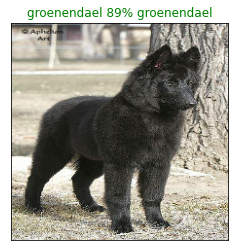

In [0]:
plot_pred(prediction_probabilities = predictions,
          labels = val_labels,
          images = val_images,
          n = 45)

There is now one function to visualize the model's top prediction. Make another to view the model's top 10 predictions

This function will do the following:
* Take an input of prediction probabilities array,ground truth array, and an integer.
* Find the prediction using `get_pred_label()`.
* Find the top 10:
  * Prediction Probabilities Indexes
  * Prediction Probabilities Values
  * Prediction Lables
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]                # in descending order
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]                  # in descending order
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup Plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = 'vertical')
  
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

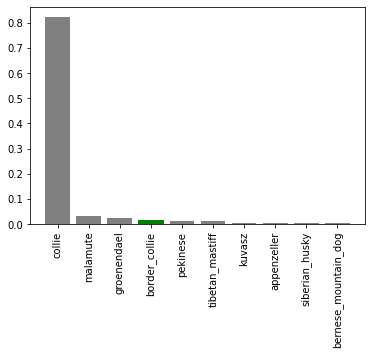

In [0]:
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 9)

Now that a function is created to help visualize the predictions and evaluate the model, review a few images.

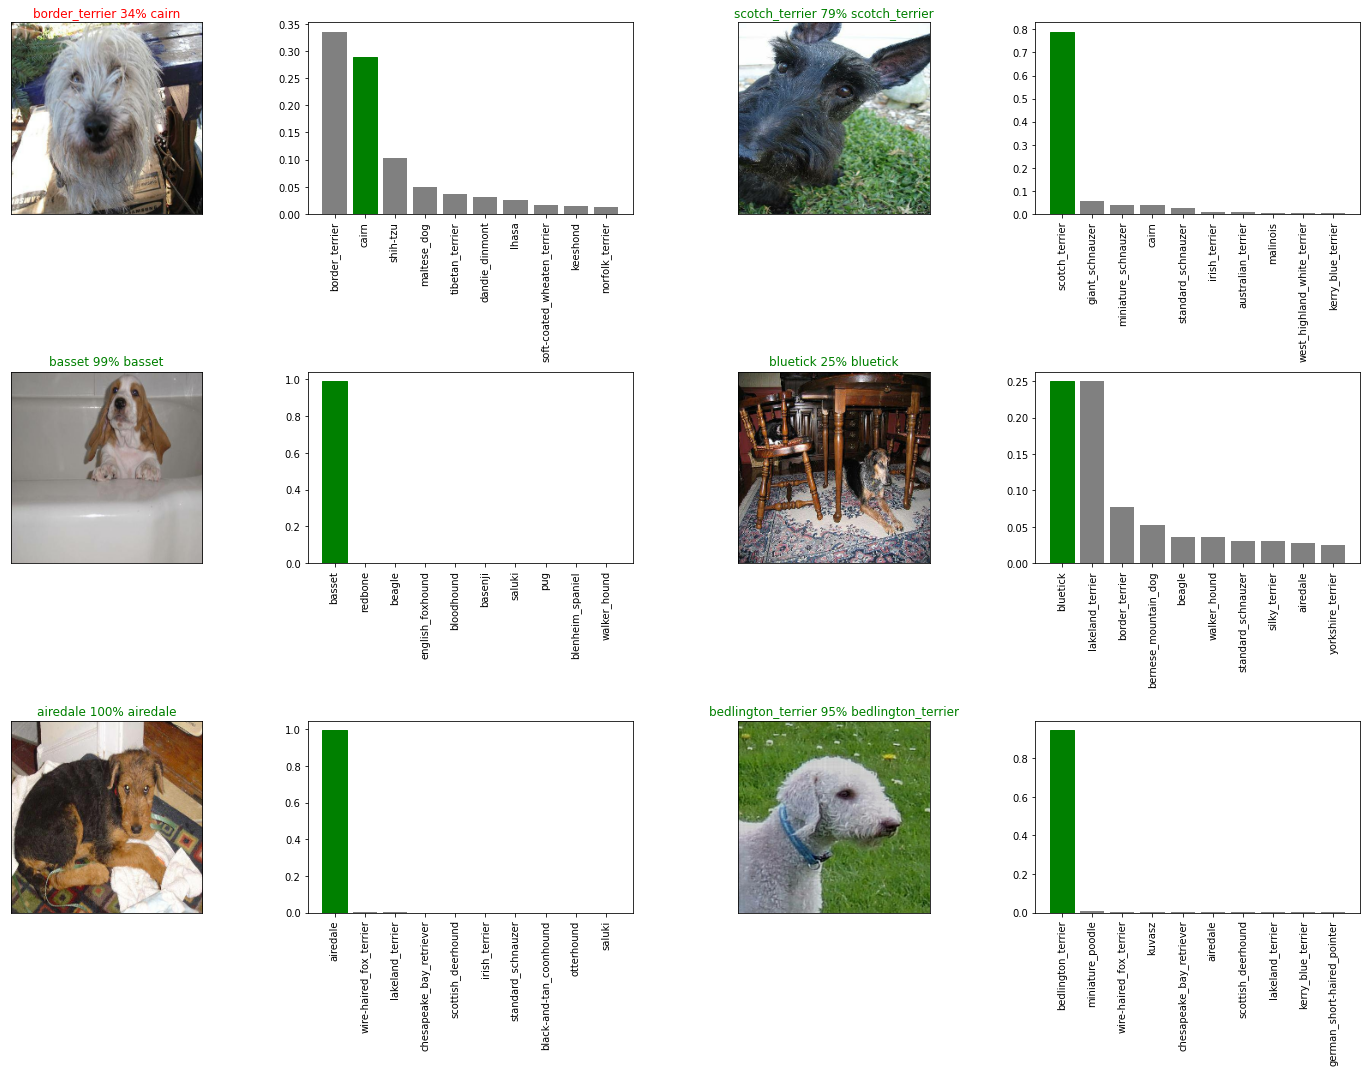

In [0]:
# Check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i + i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

**Challenge:** How to create a confusion matrix with this model's predictions and true labels?

## Saving and Reloading a Trained Model

In [0]:
# Create a function to a save the model
def save_model(model, suffix = None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/My Drive/Dog Vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path = modeldir + '-' + suffix + '.h5'            # Save format of model
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [0]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f'Loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {'KerasLayer': hub.KerasLayer})
  return model

Now that functions were created to save and load the trained model, make sure it works!

In [0]:
# Save the model trained on 1000 images
save_model(model, suffix = '1000-images-mobilenetv2-Adam')

Saving model to: drive/My Drive/Dog Vision/models/20200520-17361589996191-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200520-17361589996191-1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load the trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200520-17361589996191-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200520-17361589996191-1000-images-mobilenetv2-Adam.h5


In [0]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 110ms/step - loss: 1.2119 - accuracy: 0.6800


[1.2118693590164185, 0.6800000071525574]

In [0]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.2119 - accuracy: 0.6800


[1.2118693590164185, 0.6800000071525574]

## Training a Big Dog Model (on the full data)

In [0]:
len(X), len(y)

(10222, 10222)

In [0]:
X[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
len(X_train)

800

In [0]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# Create a model for full model
full_model = create_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, therefor cannot monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience = 3)                 # To try to prevent overfitting

**NOTE:** Running the cell below will take some time (~30min for the first epoch) due to the GPU being used in the runtime has to load all of the images into memory.

In [0]:
# Fit the full model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 7548s 24s/step - loss: 1.3428 - accuracy: 0.6719
Epoch 2/100
320/320 [==============================] - 47s 148ms/step - loss: 0.4013 - accuracy: 0.8825
Epoch 3/100
320/320 [==============================] - 46s 145ms/step - loss: 0.2397 - accuracy: 0.9359
Epoch 4/100
320/320 [==============================] - 46s 145ms/step - loss: 0.1540 - accuracy: 0.9632
Epoch 5/100
320/320 [==============================] - 47s 146ms/step - loss: 0.1050 - accuracy: 0.9798
Epoch 6/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0773 - accuracy: 0.9875
Epoch 7/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0585 - accuracy: 0.9925
Epoch 8/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0452 - accuracy: 0.9951
Epoch 9/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0376 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 46s 143m

In [0]:
save_model(full_model, suffix = 'full-image-set-mobilenetv2-Adam')

Saving model to: drive/My Drive/Dog Vision/models/20200520-20531590007993-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200520-20531590007993-full-image-set-mobilenetv2-Adam.h5'

In [279]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200520-20531590007993-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200520-20531590007993-full-image-set-mobilenetv2-Adam.h5


## Making Predictions on the Test Dataset

Since the model was trained on images in the form of Tensor batches, to make prediction on the test data, it must be transformed into the same format.

Good thing this step was functionalized as `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make prediction on the test dataset, the following must be done:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (remember that the test data does not have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [242]:
# Load test image filenames
test_path = 'drive/My Drive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/f58a21665136bb6aa4aa90c485be4315.jpg',
 'drive/My Drive/Dog Vision/test/f49b264ba04d042811304a9f994d8415.jpg',
 'drive/My Drive/Dog Vision/test/f453249b8fff37e92e02fce0d662ffa0.jpg',
 'drive/My Drive/Dog Vision/test/f4560b7a3045615d9fcc915b5b08de1b.jpg',
 'drive/My Drive/Dog Vision/test/f51f6aeea8a23b6bd62728fde8f04ad8.jpg',
 'drive/My Drive/Dog Vision/test/f56b3708592637432ac53d7f0684dfa8.jpg',
 'drive/My Drive/Dog Vision/test/f574f558d78db4e616e91f5dd5347409.jpg',
 'drive/My Drive/Dog Vision/test/f575720280425098d6faca42cff69a36.jpg',
 'drive/My Drive/Dog Vision/test/f53ae57b0cae92b14f87716a815d66e9.jpg',
 'drive/My Drive/Dog Vision/test/f532b476d5d46f4ba89b22449e3c147d.jpg']

In [243]:
len(test_filenames)

10357

In [244]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [245]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**Note:** Calling `predict()` on the full model and passing it the test data batch will take a long time to run (~1hr).

In [246]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, 
                                             verbose=1)

324/324 [==============================] - 5612s 17s/step


In [0]:
# Save predictions (NumPy array) to .csv file (for access later)
np.savetxt('drive/My Drive/Dog Vision/preds_array.csv', test_predictions, delimiter = ',')

In [0]:
# Load predictions (NumPy array) from .csv file
test_predictions = np.loadtxt('drive/My Drive/Dog Vision/preds_array.csv', delimiter = ',')

In [250]:
test_predictions[:10]

array([[4.14764031e-07, 1.03699216e-09, 6.35208622e-11, ...,
        1.50076647e-13, 3.89590478e-11, 8.06955024e-12],
       [2.77444157e-09, 3.42971180e-05, 3.77786193e-08, ...,
        1.73291528e-06, 2.75035262e-07, 2.59961430e-09],
       [6.70753470e-12, 5.80288593e-15, 6.56653343e-11, ...,
        6.08639116e-13, 6.09572072e-13, 7.25482229e-14],
       ...,
       [2.22619232e-11, 4.78011988e-12, 5.56820701e-11, ...,
        2.66301259e-10, 1.69317546e-10, 9.06415698e-06],
       [8.10044476e-09, 1.14312556e-07, 4.19143253e-09, ...,
        1.61664662e-04, 1.99648795e-08, 2.33725942e-07],
       [1.23717828e-10, 1.18033574e-08, 2.25314833e-09, ...,
        6.64778321e-09, 1.73698602e-08, 2.79695342e-12]])

In [251]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Reviewing the sample submission on Kaggle, it states that it wants the models prediction probability outputs in a DataFrame (.csv) with an ID and a column for each different dog breed.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, the following must be done:
* Create a pandas DataFrame with an ID column, as well as, a column for each dog breed.
* Add data to the ID column by extracting the test image IDs from their filepaths.
* Add data (the predicition probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [258]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns = ['id'] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
# Append test image IDs to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids

In [264]:
preds_df.head()

id  ... yorkshire_terrier
0  f58a21665136bb6aa4aa90c485be4315  ...               NaN
1  f49b264ba04d042811304a9f994d8415  ...               NaN
2  f453249b8fff37e92e02fce0d662ffa0  ...               NaN
3  f4560b7a3045615d9fcc915b5b08de1b  ...               NaN
4  f51f6aeea8a23b6bd62728fde8f04ad8  ...               NaN

[5 rows x 121 columns]

In [266]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  f58a21665136bb6aa4aa90c485be4315  ...       8.06955e-12
1  f49b264ba04d042811304a9f994d8415  ...       2.59961e-09
2  f453249b8fff37e92e02fce0d662ffa0  ...       7.25482e-14
3  f4560b7a3045615d9fcc915b5b08de1b  ...       4.66361e-06
4  f51f6aeea8a23b6bd62728fde8f04ad8  ...       1.16437e-07

[5 rows x 121 columns]

In [0]:
# Export the predictions DataFrame to a .csv file for submission to Kaggle
preds_df.to_csv('drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv',
                index = False)

## Making predictions on custom images

To make predictions on custom images, must do the following:
* Get the filepaths of the custom image
* Turn the filepaths into data batches using `create_data_batches()`. Because the custom images do not have labels, the `test_parameter` must be set to `True`.
* Pass the custom image data batch to the model's `predict()` method.
* Convert the prediction output probabilities to prediction labels.
* Compare the predicted labels to the custom images.

In [0]:
# Grab the custom image filepath
custom_path = 'drive/My Drive/Dog Vision/Aera-photos/'
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [298]:
custom_image_paths

['drive/My Drive/Dog Vision/Aera-photos/MVIMG_20200508_132001.jpg',
 'drive/My Drive/Dog Vision/Aera-photos/MVIMG_20200504_145454.jpg',
 'drive/My Drive/Dog Vision/Aera-photos/MVIMG_20200501_142532.jpg']

In [299]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)

Creating test data batches...


In [0]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [301]:
custom_preds.shape

(3, 120)

In [303]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['shih-tzu', 'soft-coated_wheaten_terrier', 'toy_poodle']

In [0]:
# Get custom images (the unbatchify() function will not work since there are no labels...fix later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

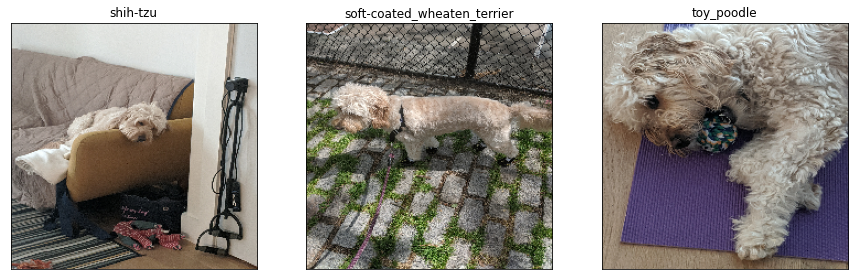

In [306]:
# Check the custome image predictions
plt.figure(figsize = (15,15))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)    # (row, cols, index)
  plt.xticks([])            # remove tick marks o x axis
  plt.yticks([])            # remove tick marks on yaxis
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
